In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam

In [2]:
data_train_path = 'split_data/train'
data_test_path = 'split_data/test'
data_val_path = 'split_data/val'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3161 files belonging to 9 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['Duryodhan',
 'Ganga',
 'Lali',
 'Parashuram',
 'Raju',
 'Sivilbahadur',
 'Sonu',
 'Tirathram',
 'Yoglaxmi']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 558 files belonging to 9 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 657 files belonging to 9 classes.


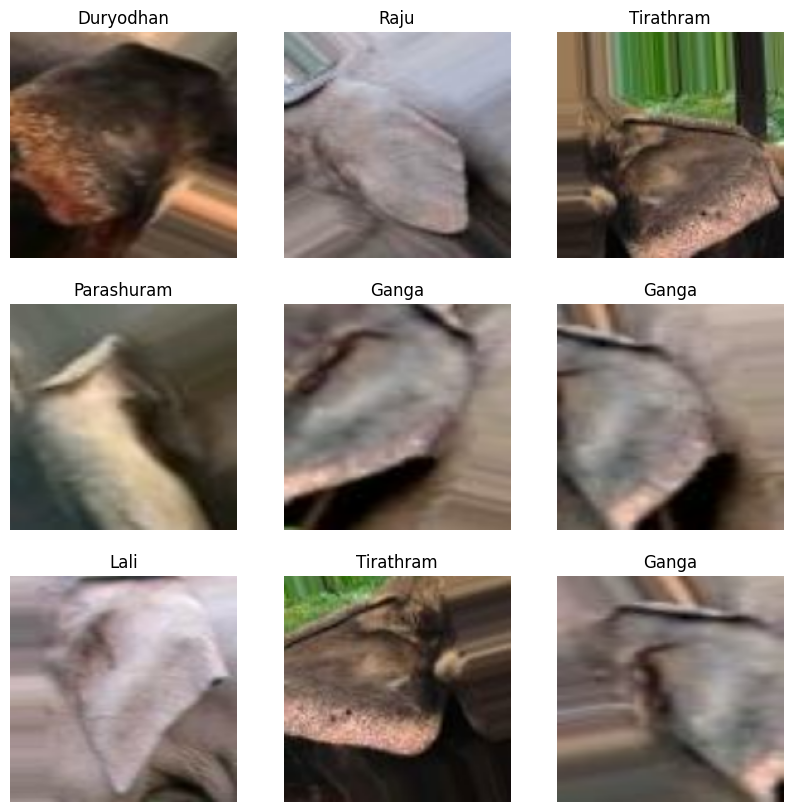

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# Define the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(len(data_cat), activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [15]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=10,callbacks=[early_stopping])

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 327ms/step - accuracy: 0.8907 - loss: 0.3694 - val_accuracy: 1.0000 - val_loss: 4.4269e-04
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 1.9966e-04
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 1.0000 - loss: 7.3702e-04 - val_accuracy: 1.0000 - val_loss: 9.6014e-05
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 1.0000 - loss: 3.8728e-04 - val_accuracy: 1.0000 - val_loss: 6.6805e-05
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 1.0000 - loss: 2.9053e-04 - val_accuracy: 1.0000 - val_loss: 5.7259e-05
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 1.0000 - loss: 4.2564e-04 - val_accuracy: 1.0000 - val_loss: 3.2295e-05
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 1.0000 - loss: 1.7989e-04 - val_accuracy: 1.0000 - val_loss: 2.2853e-05
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/s

Text(0.5, 1.0, 'Loss')

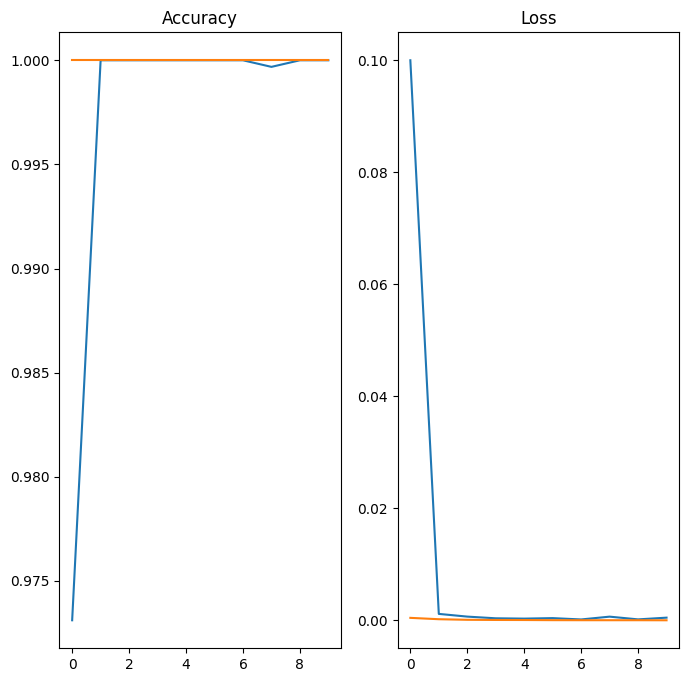

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [17]:
image = 'prediction/D.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

FileNotFoundError: [Errno 2] No such file or directory: 'prediction/D.jpg'

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 19ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Elephant in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 78.90


In [ ]:
model.save('Image_classify.keras')